In [7]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [10]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [11]:
tokenizer = info.features['text'].encoder

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # when when you feed an LSTM into another one, set return_sequences=True
    # This ensures that the outputs of the LSTM match the desired inputs of the next one
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 135s 251ms/step - loss: 0.6113 - accuracy: 0.6397 - val_loss: 0.4454 - val_accuracy: 0.8169
Epoch 2/10
391/391 [==============================] - 99s 251ms/step - loss: 0.3593 - accuracy: 0.8546 - val_loss: 0.4209 - val_accuracy: 0.8266
Epoch 3/10
391/391 [==============================] - 99s 252ms/step - loss: 0.3013 - accuracy: 0.8817 - val_loss: 0.4434 - val_accuracy: 0.8142
Epoch 4/10
391/391 [==============================] - 99s 252ms/step - loss: 0.2215 - accuracy: 0.9183 - val_loss: 0.4514 - val_accuracy: 0.8308
Epoch 5/10
391/391 [==============================] - 99s 251ms/step - loss: 0.2002 - accuracy: 0.9259 - val_loss: 0.4412 - val_accuracy: 0.8167
Epoch 6/10
391/391 [==============================] - 100s 252ms/step - loss: 0.1416 - accuracy: 0.9536 - val_loss: 0.5404 - val_accuracy: 0.8221
Epoch 7/10
391/391 [==============================] - 99s 251ms/step - loss: 0.1203 - accuracy: 0.9604 - val_loss: 0.5310 - val_

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

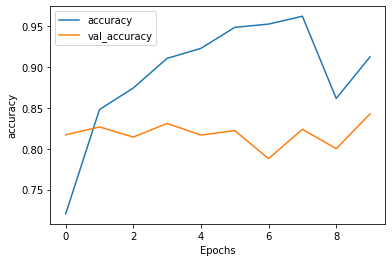

In [19]:
plot_graphs(history, 'accuracy')

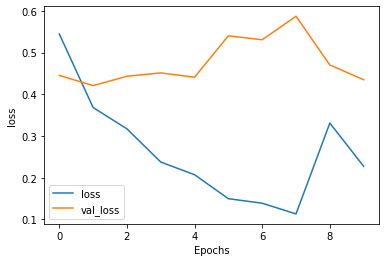

In [20]:
plot_graphs(history, 'loss')